In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/facialemotion.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/Training/Sad/Sad-370.jpg  
  inflating: Training/Training/Sad/Sad-3700.jpg  
  inflating: Training/Training/Sad/Sad-3701.jpg  
  inflating: Training/Training/Sad/Sad-3702.jpg  
  inflating: Training/Training/Sad/Sad-3703.jpg  
  inflating: Training/Training/Sad/Sad-3704.jpg  
  inflating: Training/Training/Sad/Sad-3705.jpg  
  inflating: Training/Training/Sad/Sad-3706.jpg  
  inflating: Training/Training/Sad/Sad-3707.jpg  
  inflating: Training/Training/Sad/Sad-3708.jpg  
  inflating: Training/Training/Sad/Sad-3709.jpg  
  inflating: Training/Training/Sad/Sad-371.jpg  
  inflating: Training/Training/Sad/Sad-3710.jpg  
  inflating: Training/Training/Sad/Sad-3711.jpg  
  inflating: Training/Training/Sad/Sad-3712.jpg  
  inflating: Training/Training/Sad/Sad-3713.jpg  
  inflating: Training/Training/Sad/Sad-3714.jpg  
  inflating: Training/Training/Sad/Sad-3715.jpg  
  inflating: Training/Training/Sad/Sad-3716.jpg  
 

In [3]:
train_dir = '/content/Training/Training/'
test_dir = '/content/Testing/Testing/'

In [10]:
import numpy as np 
import pandas as pd
import pickle

In [11]:
import dlib
from google.colab.patches import cv2_imshow
from tqdm import tqdm
import cv2
import os

In [7]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat')

def load_data_train(dir_path):   
    X = []
    Y = []
    it = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[it] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    p = dir_path + path + '/' + file
                    image = cv2.imread(p) 
                    rects = detector(image, 4)
        
                    if len(rects) > 0:
                        for rect in rects:
                            shape = predictor(image, rect)
                            shape_np = np.zeros((68, 2), dtype="int")
                            for i in range(0, 68):
                                shape_np[i] = (shape.part(i).x, shape.part(i).y)
                            shape = shape_np
                    else:
                        continue
        
                    image_mat = [[0 for x in range(48)] for y in range(48)]

                    for i, (x,y) in enumerate(shape):
                        try:
                            image_mat[x][y] = 255
                        except:
                          continue

                    image_mat

                    image_mat = np.asarray(image_mat)

                    X.append(image_mat)
                    Y.append(it)
            it += 1
            

    X = np.array(X)
    Y = np.array(Y)
    print(f'{len(X)} images loaded from {dir_path} directory.')

    return X, Y, labels

In [8]:
x_train, y_train, train_labels = load_data_train(train_dir)

100%|██████████| 6/6 [1:00:36<00:00, 606.13s/it]


19272 images loaded from /content/Training/Training/ directory.


In [12]:
with open('/content/drive/MyDrive/SML_Project_Variables/train_dlib.pickle', 'wb') as f:
    pickle.dump([x_train, y_train, train_labels], f)

In [13]:
with open('/content/drive/MyDrive/SML_Project_Variables/train_dlib.pickle', 'rb') as f:
    x_train, y_train, train_labels = pickle.load(f)

In [14]:
x_train.shape

(19272, 48, 48)

In [16]:
y_train.shape

(19272,)

In [17]:
from sklearn.utils import shuffle
import random

In [18]:
X_blocks = []
Y_blocks = []
Xtrain_list = []
Ytrain_list = []

df = pd.DataFrame()

x_l = len(x_train)

xlist = list(range(0, x_l))

random.shuffle(xlist)

for i in xlist:
    Xtrain_list.append(x_train[i])
    Ytrain_list.append(y_train[i])

X_train = np.asarray(Xtrain_list)
Y_train = np.asarray(Ytrain_list)

In [20]:
with open('/content/drive/MyDrive/SML_Project_Variables/train_shuffled.pickle', 'wb') as f:
    pickle.dump([X_train, Y_train, train_labels], f)

In [23]:
with open('/content/drive/MyDrive/SML_Project_Variables/train_shuffled.pickle', 'rb') as f:
    X_train, Y_train, train_labels = pickle.load(f)

In [24]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat')

def load_data_test(dir_path):   
    X = []
    Y = []
    it = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[it] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    p = dir_path + path + '/' + file
                    image = cv2.imread(p) 
                    rects = detector(image, 4)
                    
                    if len(rects) > 0:
                        for rect in rects:
                            shape = predictor(image, rect)
                            shape_np = np.zeros((68, 2), dtype="int")
                            for i in range(0, 68):
                                shape_np[i] = (shape.part(i).x, shape.part(i).y)
                            shape = shape_np
                    else:
                        shape = np.zeros((68, 2), dtype="int")

                    image_mat = [[0 for x in range(48)] for y in range(48)]

                    for i, (x,y) in enumerate(shape):
                        try:
                            image_mat[x][y] = 255
                        except:
                          continue

                    image_mat

                    image_mat = np.asarray(image_mat)

                    X.append(image_mat)
                    Y.append(it)
            it += 1
            

    X = np.array(X)
    Y = np.array(Y)
    print(f'{len(X)} images loaded from {dir_path} directory.')

    return X, Y, labels

In [25]:
x_test, y_test, test_labels = load_data_test(test_dir)

100%|██████████| 6/6 [15:11<00:00, 151.88s/it]

7067 images loaded from /content/Testing/Testing/ directory.


In [26]:
x_test.shape

(7067, 48, 48)

In [27]:
y_test.shape

(7067,)

In [28]:
with open('/content/drive/MyDrive/SML_Project_Variables/test_dlib.pickle', 'wb') as f:
    pickle.dump([x_test, y_test, test_labels], f)

In [29]:
with open('/content/drive/MyDrive/SML_Project_Variables/test_dlib.pickle', 'rb') as f:
    x_test, y_test, test_labels = pickle.load(f)

In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))

In [31]:
X_train.shape

(19272, 2304)

In [32]:
X_test.shape

(7067, 2304)

In [33]:
with open('/content/drive/MyDrive/SML_Project_Variables/final_var_X.pickle', 'wb') as f:
    pickle.dump([X_train, X_test], f)

In [34]:
with open('/content/drive/MyDrive/SML_Project_Variables/final_var_X.pickle', 'rb') as f:
    X_train, X_test = pickle.load(f)

Evaluation Metrics

In [74]:
labels = test_labels.values()

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
def precision(y_true, y_pred):
  return precision_score(y_true, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')

In [37]:
def recall(y_true, y_pred):
  return recall_score(y_true, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')

In [38]:
def f1score(y_true, y_pred):
  return f1_score(y_true, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')


In [81]:
def accuracy(y_true, y_pred):
  return accuracy_score(y_true, y_pred)

Models

In [40]:
import joblib

In [128]:
def replace_with_dict(ar, dic):
    k = np.array(list(dic.keys()))
    v = np.array(list(dic.values()))

    sidx = k.argsort()

    return v[sidx[np.searchsorted(k,ar,sorter=sidx)]]

In [131]:
y_test_rep = replace_with_dict(y_test, test_labels)

kNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [42]:
cv = RepeatedKFold(n_splits=100, n_repeats=5, random_state=1)

In [43]:
k_val = []
acc_val = []

for k in range(100, 140):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    acc = accuracy(y_test, pred)
    acc_val.append(acc)
    k_val.append(k)

In [44]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)]     
    return z

In [45]:
k_values = sort_list(k_val, acc_val)
k_values = k_values[:10]

In [46]:
k_values

[139, 127, 136, 126, 137, 138, 125, 130, 133, 135]

In [47]:
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    scores = cross_val_score(knn, X_test, y_test, scoring='accuracy', cv=cv)
    k_scores.append(scores.mean())

In [48]:
with open('/content/drive/MyDrive/SML_Project_Variables/knn_acc_k.pickle', 'wb') as f:
    pickle.dump([acc_val, k_val, k_values], f)

In [49]:
with open('/content/drive/MyDrive/SML_Project_Variables/knn_acc_k.pickle', 'rb') as f:
    acc_val, k_val, k_values = pickle.load(f)

In [51]:
index = k_scores.index(max(k_scores))
k_final = k_values[index]

In [52]:
knn_final_model = KNeighborsClassifier(n_neighbors=k_final)
knn_final_model.fit(X_train, Y_train)
Y_pred = knn_final_model.predict(X_test)
acc = accuracy(y_test, Y_pred)
print(f'For k: {k_final} the accuracy is {acc}')

For k: 130 the accuracy is 0.3261638601952738


In [53]:
joblib.dump(knn_final_model, "/content/drive/MyDrive/SML_Project_Models/knn_model.pkl") 

['/content/drive/MyDrive/SML_Project_Models/knn_model.pkl']

In [54]:
knn_final_model = joblib.load("/content/drive/MyDrive/SML_Project_Models/knn_model.pkl")

In [55]:
Y_pred_knn = knn_final_model.predict(X_test)

In [56]:
precision_knn = precision(y_test, Y_pred_knn)
precision_knn

0.368131283254558

In [57]:
recall_knn = recall(y_test, Y_pred_knn)
recall_knn

0.2885527116550178

In [58]:
f1_knn = f1score(y_test, Y_pred_knn)
f1_knn

0.2606374436796403

In [82]:
acc_knn = accuracy(y_test, Y_pred_knn)
acc_knn

0.3261638601952738

In [129]:
Y_pred_knn_rep = replace_with_dict(Y_pred_knn, test_labels)

In [132]:
print(classification_report(y_test_rep, Y_pred_knn_rep))

              precision    recall  f1-score   support

       Angry       0.18      0.05      0.08       958
        Fear       0.33      0.01      0.03      1024
       Happy       0.53      0.47      0.50      1774
     Neutral       0.26      0.51      0.35      1233
         Sad       0.25      0.52      0.33      1247
     Suprise       0.67      0.18      0.28       831

    accuracy                           0.33      7067
   macro avg       0.37      0.29      0.26      7067
weighted avg       0.37      0.33      0.29      7067



In [133]:
cm_knn = confusion_matrix(y_test, Y_pred_knn)
cm_knn

array([[ 46,   4, 199, 330, 365,  14],
       [ 37,  15, 128, 358, 447,  39],
       [ 61,   8, 826, 372, 497,  10],
       [ 44,   5, 165, 625, 387,   7],
       [ 49,   5, 141, 404, 643,   5],
       [ 24,   9, 102, 281, 265, 150]])

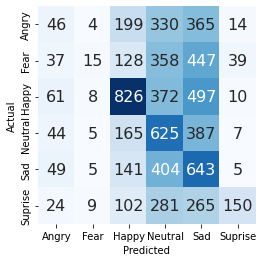

In [134]:
df_cm_knn = pd.DataFrame(cm_knn, labels, labels)
ax = sns.heatmap(df_cm_knn, annot=True, annot_kws={"size": 16}, square=True, cbar=False, fmt='g',cmap=plt.cm.Blues)
ax.set_ylim(0, 6)
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
ax.invert_yaxis()
plt.show()

Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt_model = DecisionTreeClassifier(random_state=7, max_depth=30, min_samples_split=50,min_samples_leaf=93)
dt_model.fit(X_train, Y_train)
scores = cross_val_score(dt_model, X_test, y_test, scoring='accuracy', cv=cv)
val = scores.mean()

print(val)

0.28697907444668


In [85]:
Y_pred = dt_model.predict(X_test)

In [86]:
joblib.dump(dt_model, "/content/drive/MyDrive/SML_Project_Models/decision_tree_model.pkl") 

['/content/drive/MyDrive/SML_Project_Models/decision_tree_model.pkl']

In [87]:
dt_model = joblib.load("/content/drive/MyDrive/SML_Project_Models/decision_tree_model.pkl")

In [88]:
Y_pred_dtfinal = dt_model.predict(X_test)

In [89]:
precision_dt = precision(y_test, Y_pred_dtfinal)
precision_dt

0.25324826631617436

In [90]:
recall_dt = recall(y_test, Y_pred_dtfinal)
recall_dt

0.23563332076072885

In [91]:
f1_dt = f1score(y_test, Y_pred_dtfinal)
f1_dt

0.1817997913992254

In [92]:
accuracy_dt = accuracy(y_test, Y_pred_dtfinal)
accuracy_dt

0.29475024762982877

In [135]:
Y_pred_dtfinal_rep = replace_with_dict(Y_pred_dtfinal, test_labels)

In [136]:
print(classification_report(y_test_rep, Y_pred_dtfinal_rep))

              precision    recall  f1-score   support

       Angry       0.19      0.01      0.02       958
        Fear       0.22      0.02      0.03      1024
       Happy       0.29      0.82      0.43      1774
     Neutral       0.30      0.31      0.30      1233
         Sad       0.20      0.01      0.03      1247
     Suprise       0.32      0.24      0.27       831

    accuracy                           0.29      7067
   macro avg       0.25      0.24      0.18      7067
weighted avg       0.26      0.29      0.21      7067



In [137]:
cm_dt = confusion_matrix(y_test, Y_pred_dtfinal)
cm_dt

array([[  12,    9,  678,  167,   11,   81],
       [  12,   16,  709,  188,    9,   90],
       [  11,   14, 1456,  176,   13,  104],
       [  14,   15,  726,  380,   22,   76],
       [   8,   12,  907,  217,   17,   86],
       [   7,    8,  465,  138,   11,  202]])

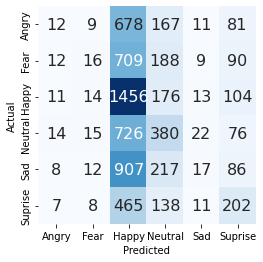

In [138]:
df_cm_dt = pd.DataFrame(cm_dt, labels, labels)
ax = sns.heatmap(df_cm_dt, annot=True, annot_kws={"size": 16}, square=True, cbar=False, fmt='g', cmap=plt.cm.Blues)
ax.set_ylim(0, 6)
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
ax.invert_yaxis()
plt.show()

Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=9, min_samples_split = 5, min_samples_leaf = 1, max_depth = 86)
rf_model.fit(X_train, Y_train)
scores = cross_val_score(rf_model, X_test, y_test, scoring='accuracy', cv=cv)
val = scores.mean()

print(val)

0.3366828973843058


In [99]:
Y_pred = rf_model.predict(X_test)
acc = accuracy(y_test, Y_pred)
print(acc)

0.356728456204896


In [100]:
joblib.dump(rf_model, "/content/drive/MyDrive/SML_Project_Models/random_forest_model.pkl") 

['/content/drive/MyDrive/SML_Project_Models/random_forest_model.pkl']

In [101]:
rf_model = joblib.load("/content/drive/MyDrive/SML_Project_Models/random_forest_model.pkl")

In [102]:
Y_pred_rffinal = rf_model.predict(X_test)

In [103]:
precision_rf = precision(y_test, Y_pred_rffinal)
precision_rf

0.5565996431950638

In [104]:
recall_rf = recall(y_test, Y_pred_rffinal)
recall_rf

0.29383917297262807

In [105]:
f1_rf = f1score(y_test, Y_pred_rffinal)
f1_rf

0.26132863844112214

In [106]:
accuracy_rf = accuracy(y_test, Y_pred_rffinal)
accuracy_rf

0.356728456204896

In [139]:
Y_pred_rffinal_rep = replace_with_dict(Y_pred_rffinal, test_labels)

In [140]:
print(classification_report(y_test_rep, Y_pred_rffinal_rep))

              precision    recall  f1-score   support

       Angry       0.71      0.06      0.11       958
        Fear       0.72      0.08      0.14      1024
       Happy       0.32      0.94      0.47      1774
     Neutral       0.36      0.34      0.35      1233
         Sad       0.51      0.03      0.05      1247
     Suprise       0.72      0.32      0.44       831

    accuracy                           0.36      7067
   macro avg       0.56      0.29      0.26      7067
weighted avg       0.52      0.36      0.28      7067



In [141]:
cm_rf = confusion_matrix(y_test, Y_pred_rffinal)
cm_rf

array([[  57,    8,  709,  159,    9,   16],
       [   5,   81,  710,  176,    5,   47],
       [   4,    2, 1667,   88,    2,   11],
       [   2,    8,  775,  416,   16,   16],
       [   6,    5,  954,  236,   34,   12],
       [   6,    8,  462,   88,    1,  266]])

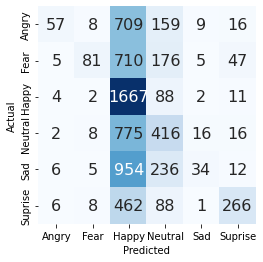

In [142]:
df_cm_rf = pd.DataFrame(cm_rf, labels, labels)
ax = sns.heatmap(df_cm_rf, annot=True, annot_kws={"size": 16}, square=True, cbar=False, fmt='g', cmap=plt.cm.Blues)
ax.set_ylim(0, 6)
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
ax.invert_yaxis()
plt.show()

Gaussian Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [163]:
gnb_model = GaussianNB()

gnb_model.fit(X_train, Y_train)

GaussianNB()

In [164]:
y_pred = gnb_model.predict(X_test)
acc = accuracy(y_test, y_test)
print(acc)

1.0


In [165]:
joblib.dump(gnb_model, "/content/drive/MyDrive/SML_Project_Models/gaussian_nb_model.pkl") 

['/content/drive/MyDrive/SML_Project_Models/gaussian_nb_model.pkl']

In [166]:
gnb_model = joblib.load("/content/drive/MyDrive/SML_Project_Models/gaussian_nb_model.pkl")

In [167]:
Y_pred_gnb_final = gnb_model.predict(X_test)

In [168]:
precision_gnb = precision(y_test, Y_pred_gnb_final)
precision_gnb

0.29615355380778047

In [169]:
recall_gnb = recall(y_test, Y_pred_gnb_final)
recall_gnb

0.2307413915255219

In [170]:
f1_gnb = f1score(y_test, Y_pred_gnb_final)
f1_gnb

0.17083467668592098

In [171]:
accuracy_gnb = accuracy(y_test, Y_pred_gnb_final)
accuracy_gnb

0.23079100042450829

In [172]:
Y_pred_gnb_final_rep = replace_with_dict(Y_pred_gnb_final, test_labels)

In [173]:
print(classification_report(y_test_rep, Y_pred_gnb_final_rep))

              precision    recall  f1-score   support

       Angry       0.18      0.05      0.07       958
        Fear       0.16      0.03      0.05      1024
       Happy       0.44      0.00      0.01      1774
     Neutral       0.21      0.67      0.31      1233
         Sad       0.25      0.47      0.33      1247
     Suprise       0.54      0.16      0.25       831

    accuracy                           0.23      7067
   macro avg       0.30      0.23      0.17      7067
weighted avg       0.30      0.23      0.16      7067



In [174]:
cm_gnb = confusion_matrix(y_test, Y_pred_gnb_final)
cm_gnb

array([[  45,   26,    4,  521,  344,   18],
       [  43,   29,    1,  501,  413,   37],
       [  61,   49,    8, 1190,  443,   23],
       [  37,   20,    1,  820,  332,   23],
       [  41,   33,    1,  564,  592,   16],
       [  30,   21,    3,  390,  250,  137]])

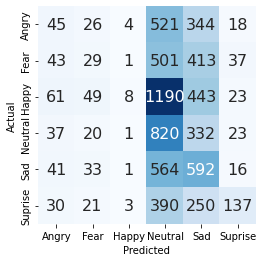

In [175]:
df_cm_gnb = pd.DataFrame(cm_gnb, labels, labels)
ax = sns.heatmap(df_cm_gnb, annot=True, annot_kws={"size": 16}, square=True, cbar=False, fmt='g', cmap=plt.cm.Blues)
ax.set_ylim(0, 6)
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
ax.invert_yaxis()
plt.show()

CNN - VGG16

In [198]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop

In [177]:
IMG_SIZE= (48, 48)

In [178]:
def load_data_cnn(dir_path, IMG_SIZE):
   
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = img.astype('float32') / 255
                    resized = cv2.resize(img, IMG_SIZE, interpolation = cv2.INTER_AREA)
                    X.append(resized)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [179]:
from keras.utils.np_utils import to_categorical

In [180]:
X_train_cnn, y_train_cnn, train_labels = load_data_cnn(train_dir, IMG_SIZE)

100%|██████████| 6/6 [00:02<00:00,  2.01it/s]


28273 images loaded from /content/Training/Training/ directory.


In [181]:
y_train_cnn_cat = to_categorical(y_train_cnn, num_classes=6)
y_train_cnn_cat.shape

(28273, 6)

In [182]:
with open('/content/drive/MyDrive/SML_Project_Variables/train_cnn.pickle', 'wb') as f:
    pickle.dump([X_train_cnn, y_train_cnn, y_train_cnn_cat, train_labels], f)

In [183]:
with open('/content/drive/MyDrive/SML_Project_Variables/train_cnn.pickle', 'rb') as f:
    X_train_cnn, y_train_cnn, y_train_cnn_cat, train_labels = pickle.load(f)

In [184]:
X_test_cnn, y_test_cnn, test_labels = load_data_cnn(test_dir,IMG_SIZE)

100%|██████████| 6/6 [00:00<00:00,  6.64it/s]


7067 images loaded from /content/Testing/Testing/ directory.


In [185]:
y_test_cnn_cat = to_categorical(y_test_cnn, num_classes=6)
y_test_cnn_cat.shape

(7067, 6)

In [186]:
with open('/content/drive/MyDrive/SML_Project_Variables/test_cnn.pickle', 'wb') as f:
    pickle.dump([X_test_cnn, y_test_cnn, y_test_cnn_cat, test_labels], f)

In [187]:
with open('/content/drive/MyDrive/SML_Project_Variables/test_cnn.pickle', 'rb') as f:
    X_test_cnn, y_test_cnn, y_test_cnn_cat, test_labels = pickle.load(f)

In [190]:
checkpoint_path = "/content/drive/MyDrive/SML_Project_Models/training_cc_model/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    monitor='val_accuracy', 
    mode='max',
    save_freq=5*20)

In [191]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [192]:
base_model = VGG16(
        weights=None,
        include_top=False, 
        input_shape=IMG_SIZE + (3,)
    )

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [193]:
NUM_CLASSES = 6

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation="softmax"))

In [199]:
def deep_model(model, X_train, Y_train, epochs, batch_size):
    model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy'])
    
    history = model.fit(X_train,
                        Y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1,
                        callbacks=[cp_callback, es])
    return history

In [ ]:
epochs = 20
batch_size = 64

model.save_weights(checkpoint_path.format(epoch=0))
history = deep_model(model, X_train_cnn, y_train_cnn_cat, epochs, batch_size)

Epoch 1/20
 97/442 [=====>........................] - ETA: 42:48 - loss: 0.4929 - accuracy: 0.2305
Epoch 00001: saving model to /content/drive/MyDrive/SML_Project_Models/training_cc_model/cp-0001.ckpt
197/442 [============>.................] - ETA: 30:24 - loss: 0.4782 - accuracy: 0.2322
Epoch 00001: saving model to /content/drive/MyDrive/SML_Project_Models/training_cc_model/cp-0001.ckpt
297/442 [===================>..........] - ETA: 17:49 - loss: 0.4700 - accuracy: 0.2323
Epoch 00001: saving model to /content/drive/MyDrive/SML_Project_Models/training_cc_model/cp-0001.ckpt
397/442 [=========================>....] - ETA: 5:30 - loss: 0.4646 - accuracy: 0.2364
Epoch 00001: saving model to /content/drive/MyDrive/SML_Project_Models/training_cc_model/cp-0001.ckpt
442/442 [==============================] - 3240s 7s/step - loss: 0.4629 - accuracy: 0.2387
Epoch 2/20
 55/442 [==>...........................] - ETA: 46:29 - loss: 0.4492 - accuracy: 0.2500
Epoch 00002: saving model to /content/dr

In [ ]:
deep_model.save('/content/drive/MyDrive/SML_Project_Models/cnn_vgg16_model.h5')

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
predictions = model.predict(X_test)
y_pred_cnn = [np.argmax(probas) for probas in predictions]

accuracy_cnn = accuracy(y_test, y_pred_cnn)
print('Test Accuracy = %.2f' % accuracy_cnn)

confusion_mtx = confusion_matrix(y_test, y_pred) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(test_labels.items()), normalize=False)

In [ ]:
precision_cnn = precision(y_test, y_pred_cnn)
precision_cnn

In [ ]:
recall_cnn = recall(y_test, y_pred_cnn)
recall_cnn

In [ ]:
f1_cnn = f1score(y_test, y_pred_cnn)
f1_cnn